In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import date

%matplotlib inline
pd.set_option('display.max_columns', None)

from sklearn.preprocessing import scale
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import KNNImputer
from sklearn.cluster import KMeans

In [50]:
df_train = pd.read_csv("df_train.csv")

In [51]:
df_train.head()

,CustomerID,Income,Kid_Younger6,Children_6to18,Recency,MntMeat&Fish,MntEntries,MntVegan&Vegetarian,MntDrinks,MntDesserts,MntAdditionalRequests,NumOfferPurchases,NumAppPurchases,NumTakeAwayPurchases,NumStorePurchases,NumAppVisitsMonth,Complain,Response_Cmp1,Response_Cmp2,Response_Cmp3,Response_Cmp4,Response_Cmp5,Gender,has_Kids,Age,daysAsCardClient,Graduation,HighSchool,Master,PhD,Married,Single,Widow,Mnt_pday_card
0,14594,113947.0,0,0,43.0,4640.0,3380,5700.0,2240.0,562.0,154.0,2,10,7,7,4,0,0,1,0,0,0,0,0,42,815,1,0,0,0,0,1,0,20.461350
1,19070,114297.0,0,0,74.0,7080.0,3680,7620.0,1840.0,1220.0,46.0,1,5,9,12,2,0,0,0,0,0,0,0,0,49,724,1,0,0,0,1,0,0,29.676796
2,29888,115476.0,0,0,85.0,4130.0,380,4890.0,3640.0,380.0,28.0,1,5,5,7,1,0,0,0,0,0,0,1,0,63,447,0,0,0,1,1,0,0,30.085011
3,12221,101172.0,1,1,25.0,3590.0,0,1770.0,80.0,180.0,14.0,5,8,3,8,5,0,0,0,0,0,0,1,1,43,539,1,0,0,0,1,0,0,10.452690
4,21107,123128.0,0,0,64.0,5390.0,1126,9495.0,656.0,562.0,74.0,0,4,7,8,5,0,1,0,1,0,0,1,0,52,844,0,1,0,0,0,1,0,20.501185


In [22]:
df_train.set_index(keys = "CustomerID", inplace = True)

In [55]:

scaler = MinMaxScaler()
df_train = pd.DataFrame(scaler.fit_transform(df_train), columns = df_train.columns)
df_train.describe()

,CustomerID,Income,Kid_Younger6,Children_6to18,Recency,MntMeat&Fish,MntEntries,MntVegan&Vegetarian,MntDrinks,MntDesserts,MntAdditionalRequests,NumOfferPurchases,NumAppPurchases,NumTakeAwayPurchases,NumStorePurchases,NumAppVisitsMonth,Complain,Response_Cmp1,Response_Cmp2,Response_Cmp3,Response_Cmp4,Response_Cmp5,Gender,has_Kids,Age,daysAsCardClient,Graduation,HighSchool,Master,PhD,Married,Single,Widow,Mnt_pday_card
count,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000
mean,0.499713,0.321057,0.220286,0.245286,0.497324,0.205576,0.134359,0.107225,0.137302,0.135843,0.170908,0.153027,0.462747,0.159774,0.445429,0.263914,0.010286,0.079143,0.073286,0.083000,0.065857,0.014286,0.733286,0.703429,0.500852,0.496857,0.502571,0.095000,0.163143,0.213714,0.653143,0.219714,0.035000,0.137660
std,0.289526,0.150587,0.271739,0.271087,0.291668,0.224992,0.197951,0.150486,0.202368,0.201563,0.199401,0.144185,0.211195,0.138798,0.253516,0.137430,0.100903,0.269981,0.260624,0.275902,0.248050,0.118675,0.442273,0.456779,0.210461,0.290167,0.500029,0.293236,0.369522,0.409957,0.476004,0.414083,0.183793,0.152384
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.247700,0.208774,0.000000,0.000000,0.242424,0.016689,0.010050,0.009240,0.010050,0.010050,0.036145,0.062500,0.307692,0.041667,0.230769,0.150000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.350877,0.246066,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.015840
50%,0.500800,0.317659,0.000000,0.000000,0.494949,0.121495,0.045226,0.042735,0.045226,0.045226,0.096386,0.125000,0.461538,0.125000,0.384615,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.491228,0.488555,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.080238
75%,0.750475,0.423237,0.500000,0.500000,0.747475,0.338451,0.170854,0.146108,0.175879,0.170854,0.228916,0.187500,0.615385,0.208333,0.615385,0.350000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.666667,0.748212,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.217713
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Customer Value Prespective

In [25]:
df_train.columns

Index(['Income', 'Kid_Younger6', 'Children_6to18', 'Recency', 'MntMeat&Fish',
       'MntEntries', 'MntVegan&Vegetarian', 'MntDrinks', 'MntDesserts',
       'MntAdditionalRequests', 'NumOfferPurchases', 'NumAppPurchases',
       'NumTakeAwayPurchases', 'NumStorePurchases', 'NumAppVisitsMonth',
       'Complain', 'Response_Cmp1', 'Response_Cmp2', 'Response_Cmp3',
       'Response_Cmp4', 'Response_Cmp5', 'Gender', 'has_Kids', 'Age',
       'daysAsCardClient', 'Graduation', 'HighSchool', 'Master', 'PhD',
       'Married', 'Single', 'Widow', 'Mnt_pday_card'],
      dtype='object')

In [26]:
#using only Monetary variables for the customer value prespective
df_value = df_train[['Income', 'MntMeat&Fish','MntEntries', 'MntVegan&Vegetarian', 'MntDrinks', 'MntDesserts', 'MntAdditionalRequests','Mnt_pday_card']].copy()


In [39]:
ks = range(1,11)
inertias = []


for k in ks:
    model = KMeans(n_clusters = k).fit(df_value)
    inertias.append(model.inertia_)

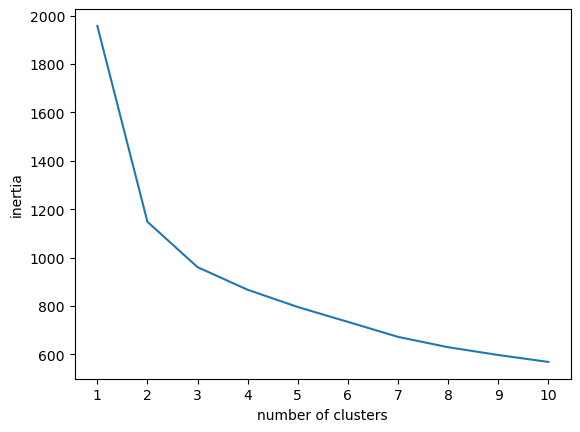

In [40]:
# Plot ks (x-axis) vs inertias (y-axis) using plt.plot(). 
plt.plot(ks, inertias)

# define the label for the x axis as 'number of clusters' using matplotlib.pyplot.xlabel
plt.xlabel('number of clusters')
# define the label for the y axis as 'inertia' using matplotlib.pyplot.ylabel
plt.ylabel('inertia')
# define the ticks on the x axis using the values of ks
plt.xticks(ks)
# call plt.show()
plt.show()

In [ ]:
# from scipy.cluster import hierarchy
# #from sklearn.cluster import AgglomerativeClustering - The option available in sklearn

# # Get a random sample, as hierarchical clustering can take a lot of time to run.
# df_value_sample = df_value.sample(n = 1000, random_state = 100)

# # create clusters using the "ward method"
# clusters = hierarchy.linkage(df_value_sample, method="ward")

# # create the dendrogram using the hierarchy.dendrogram() method.
# plt.figure(figsize=(8, 6))
# dendrogram = hierarchy.dendrogram(clusters)

### Using k = 2

In [41]:
df_value_k2 = df_value.copy()
model_k2 = sk.cluster.KMeans(n_clusters = 2, random_state = 1).fit(df_value_k2)

In [ ]:
df_value_k2.head()

In [ ]:
df_value_k2["label"] = model_k2.labels_

In [ ]:
df_value_k2["label"].value_counts()

In [54]:
df_value_k2.groupby(["label"]).mean().transpose()

KeyError: 'label'

### Using K=3

In [ ]:
df_value_k3 = df_value.copy()
model_k3 = sk.cluster.KMeans(n_clusters = 3, random_state = 2).fit(df_value_k3)

In [ ]:
df_value_k3["label"] = model_k3.labels_

In [ ]:
df_value_k3.groupby(["label"]).describe()

The model is creating a cluster around the outliers values

### Using K = 4

In [ ]:
df_value_k4 = df_value.copy()
model_k4 = sk.cluster.KMeans(n_clusters = 4, random_state = 2).fit(df_value_k4)

In [ ]:
df_value_k4["label"] = model_k4.labels_

Measuring distances between clusters

In [ ]:
from sklearn.metrics.pairwise import euclidean_distances

dists_k3 = euclidean_distances(model_k3.cluster_centers_)
dists_k3

In [ ]:
dists_k4 = euclidean_distances(model_k4.cluster_centers_)
dists_k4

### Visualization

In [ ]:
cluster0 = df_value_k2[df_value_k2.label == 0]
cluster1 = df_value_k2[df_value_k2.label == 1]


In [ ]:
sns.histplot(cluster0['Mnt_pday_card'],color='red',label='Cluster 0', bins = 20)
sns.histplot(cluster1['Mnt_pday_card'],color='yellow',label='Cluster 1', bins = 20)
plt.legend()

In [ ]:
cluster0 = df_value_k3[df_value_k3.label == 0]
cluster1 = df_value_k3[df_value_k3.label == 1]
cluster2 = df_value_k3[df_value_k3.label == 2]

In [ ]:
sns.histplot(cluster0['Mnt_pday_card'],color='red',label='Cluster 0', bins = 20)
sns.histplot(cluster1['Mnt_pday_card'],color='yellow',label='Cluster 1', bins = 20)
sns.histplot(cluster2['Mnt_pday_card'],color='green',label='Cluster 2', bins = 20)
plt.legend()

In [ ]:
cluster0 = df_value_k4[df_value_k4.label == 0]
cluster1 = df_value_k4[df_value_k4.label == 1]
cluster2 = df_value_k4[df_value_k4.label == 2]
cluster3 = df_value_k4[df_value_k4.label == 3]

In [ ]:
sns.histplot(cluster0['Income'],color='red',label='Cluster 0', bins = 20)
sns.histplot(cluster1['Income'],color='yellow',label='Cluster 1', bins = 20)
sns.histplot(cluster2['Income'],color='green',label='Cluster 2', bins = 20)
sns.histplot(cluster3['Income'],color='k',label='Cluster 3', bins = 20)
plt.legend()